In [1]:
include("../../HamiltonODE.jl")
using Plots
using LaTeXStrings
pyplot();

Finished loading HamiltonSystem
Finished loading HamiltonSteps
Finished loading HamiltonIntegrator
Finished loading HamiltonPlot
Finished loading HamiltonInterpolate
Finished loading HamiltonODE


In [2]:
d = 2
m = (1,)
q0 = [0,-2.9]
p0 =[0.8718,0]
l=1
r1(q) = norm(q)
dr1(q) = q/norm(q)

r2(q) = sqrt(q[1]^2+(q[2]+2)^2)
dr2(q) = [q[1]/sqrt(q[1]^2 + (2 + q[2])^2), (2 + q[2])/sqrt(q[1]^2 + (2 + q[2])^2)]


U(q)=1/2*(r1(q)-1)^2+5*(r2(q)-1)^2
F(q)=-(r1(q)-1)*dr1(q)-10*(r2(q)-1)*dr2(q)

HS = HamiltonSystem(d,m,q0,p0,F,U);

In [3]:
T=5000
N = 10
h = 1/N;

In [4]:
Is = [
    Integrator(verlet_step,h,T),
    Integrator(puls_projected_step,h,T;step=verlet_step),
    Integrator(puls_projected_step,h,T;step=rk4_step),
    Integrator(projected_step,h,T;step=verlet_step,no_warning=true),
    Integrator(projected_step,h,T;step=verlet_step,max_iter=1e5),
    Integrator(projected_step,h,T;step=rk4_step,no_warning=true),
    Integrator(projected_step,h,T;step=rk4_step,max_iter=1e5),
    ];
ts,Qs,Ps = integrate(HS,Is);

Integrating using verlet_step dt = 0.1...100%|██████████| Time: 0:00:01
Integrating using puls_projected_step dt = 0.1...100%|██| Time: 0:00:01
Integrating using puls_projected_step dt = 0.1...100%|██| Time: 0:00:00
Integrating using projected_step dt = 0.1...100%|███████| Time: 0:00:0339m
Integrating using projected_step dt = 0.1...100%|███████| Time: 0:00:07
Integrating using projected_step dt = 0.1...100%|███████| Time: 0:00:02
Integrating using projected_step dt = 0.1...100%|███████| Time: 0:00:02


In [5]:
s = T*N
n=1000;

In [6]:
names = getNames(Is)
EnergyErrors = getEnergyErrors(HS,Qs,Ps);

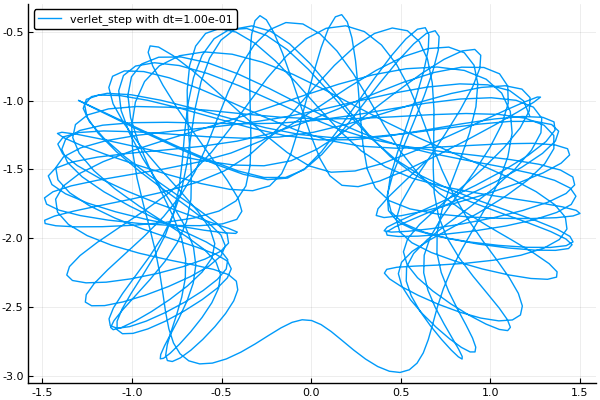

In [7]:
plotOrbits([Qs[1]],names,index=s-n:s)

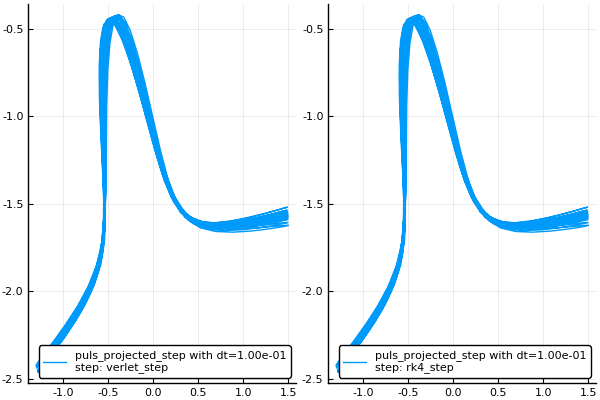

In [8]:
plotOrbits(Qs[2:3],names[2:3],index=s-n:s,layout=2)

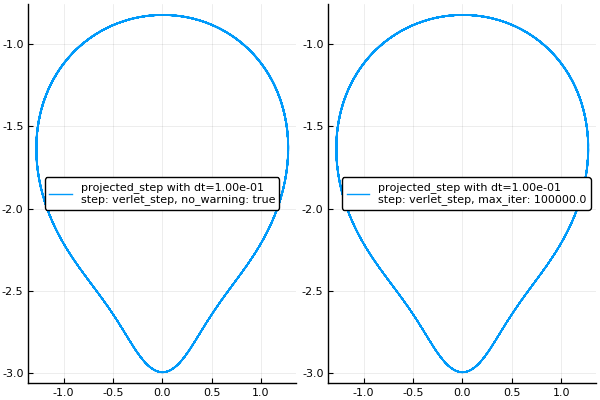

In [9]:
plotOrbits(Qs[4:5],names[4:5],index=s-n:s,layout=2)

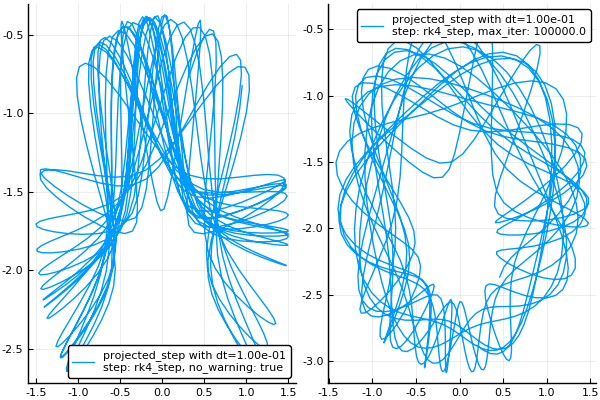

In [10]:
plotOrbits(Qs[6:7],names[6:7],index=s-n:s,layout=2)

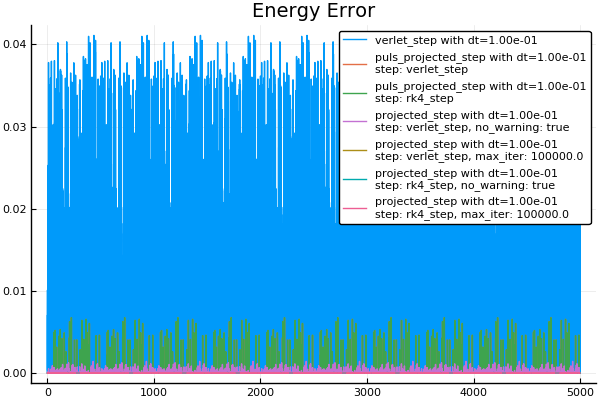

In [11]:
plot(ts[1:N:end],[e[1:N:end] for e in EnergyErrors],label=hcat(names...),title="Energy Error")